In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import time
from datetime import datetime

In [2]:
df = pd.read_csv('preprocessed_sales.csv')
df

,InvoiceNumber,ProductCode,ProductName,Quantity,InvoiceDate,UnitPrice,CustomerId,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
400911,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
400912,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
400913,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
400914,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [3]:
number_of_orders = df['InvoiceNumber'].nunique()
number_of_orders

19213

In [4]:
last = df['InvoiceDate'].sort_values()[400915]
first = df['InvoiceDate'].sort_values()[0]
window_period = tuple([first,last])
window_period

('2009-12-01 07:45:00', '2010-12-09 20:01:00')

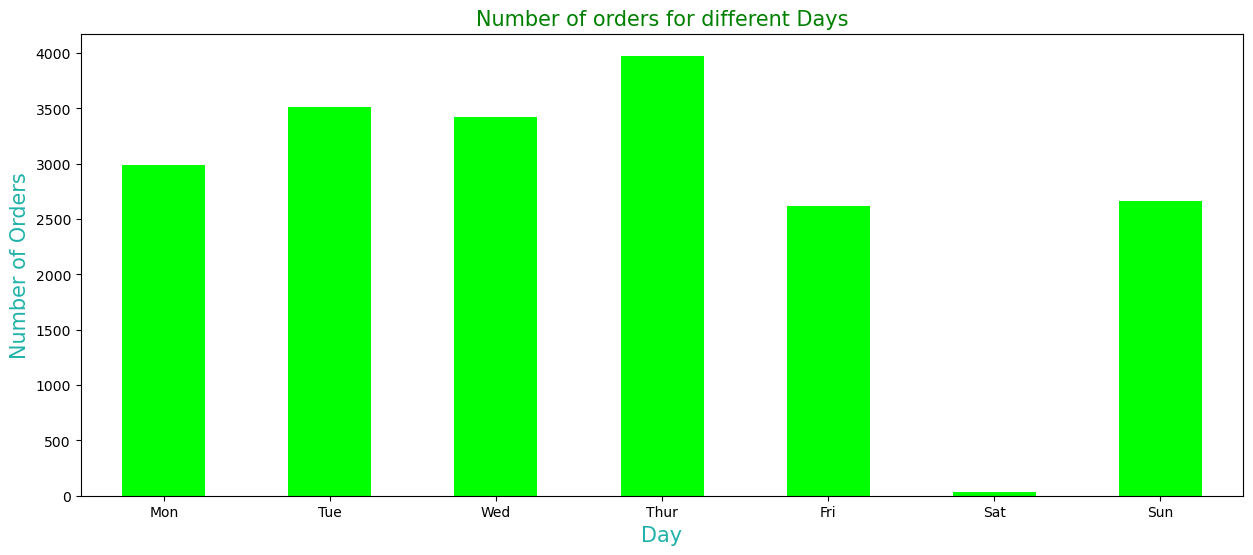

In [5]:
fig1, ax1 = plt.subplots(figsize=(15,6))
df['day_of_week'] = pd.to_datetime(df["InvoiceDate"]).dt.day_of_week
df.groupby('day_of_week')['InvoiceNumber'].nunique().sort_index().plot(ax=ax1, kind="bar", color="lime")




ax1.set_title('Number of orders for different Days', color ='green',fontsize=15)
ax1.set_xlabel('Day',color='lightseagreen',fontsize=15)
ax1.set_ylabel('Number of Orders',color='lightseagreen',fontsize=15)
ax1.set_xticklabels(labels=['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'], rotation=0);





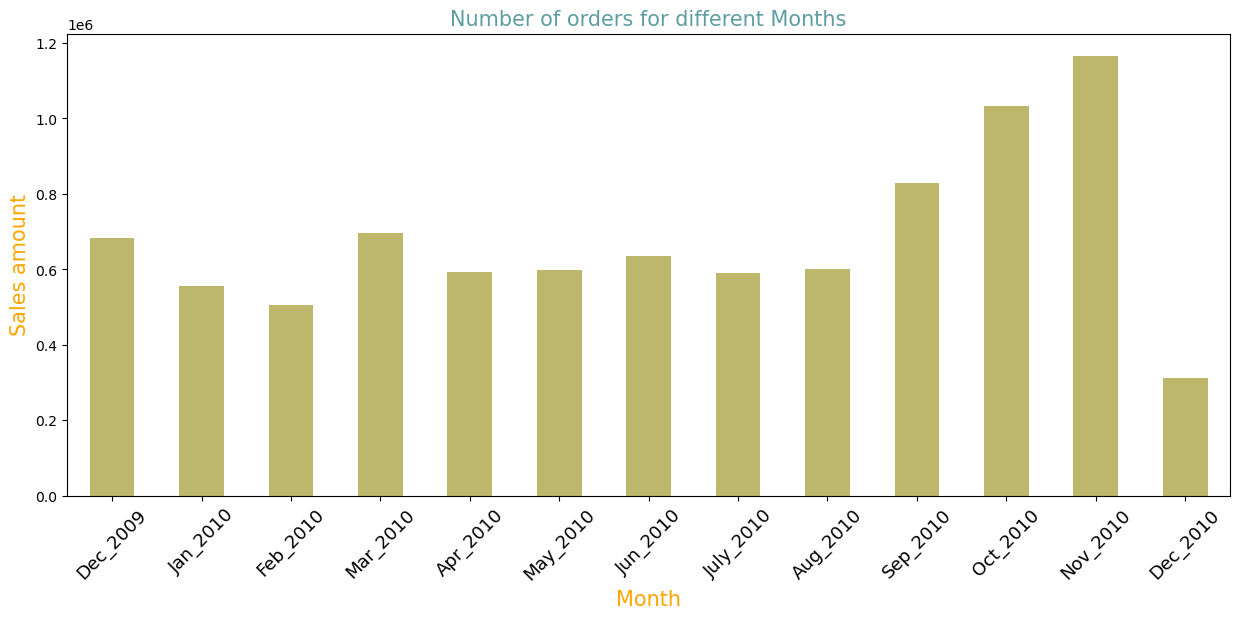

In [6]:
# fig2, ax2 = plt.subplots(figsize=(15,6))
# df['TotalPrice'] = df['UnitPrice']*df['Quantity']
# df['salemonthly'] = pd.to_datetime(df["InvoiceDate"]).dt.month
# df.groupby('salemonthly')['InvoiceNumber'].nunique().sort_index().plot(ax=ax2, kind="bar", color="darkkhaki")

# ax2.set_title('Number of orders for different Months', color ='cadetblue',fontsize=15)
# ax2.set_xlabel('Month',color='orange',fontsize=15)
# ax2.set_ylabel('Sales amount',color='orange',fontsize=15)
# ax2.set_xticklabels(['Dec_2009','Jan_2010','Feb_2010','Mar_2010','Apr_2010','May_2010','Jun_2010','July_2010','Aug_2010','Sep_2010','Oct_2010','Nov_2010','Dec_2010'],rotation=45,fontsize=13);


# df['TotalPrice'] = df['UnitPrice'] * df['Quantity']
# df['month_year'] = pd.to_datetime(df['InvoiceDate']).dt.to_period('M') 
# monthly_sales = df.groupby('month_year')['TotalPrice'].sum().sort_index()
# fig2, ax2 = plt.subplots(figsize=(15, 6))
# monthly_sales.plot(kind='bar', ax=ax2, color='darkkhaki')
# ax2.set_title('Total Sales per Month', color='cadetblue', fontsize=15)
# ax2.set_xlabel('Month-Year', color='orange', fontsize=15)
# ax2.set_ylabel('Total Sales Amount', color='orange', fontsize=15)
# ax2.set_xticklabels(monthly_sales.index.astype(str), rotation=45, fontsize=13)
# plt.tight_layout()  
# plt.show()

fig2, ax2 = plt.subplots(figsize=(15,6))
df['TotalPrice'] = df['UnitPrice']*df['Quantity']
df['salemonthly'] = pd.to_datetime(df["InvoiceDate"]).dt.to_period('M') 
df.groupby('salemonthly')['TotalPrice'].sum().sort_index().plot(ax=ax2, kind="bar", color="darkkhaki")
ax2.set_title('Number of orders for different Months', color ='cadetblue',fontsize=15)
ax2.set_xlabel('Month',color='orange',fontsize=15)
ax2.set_ylabel('Sales amount',color='orange',fontsize=15)
ax2.set_xticklabels(['Dec_2009','Jan_2010','Feb_2010','Mar_2010','Apr_2010','May_2010','Jun_2010','July_2010','Aug_2010','Sep_2010','Oct_2010','Nov_2010','Dec_2010'],rotation=45,fontsize=13);                   